## Project description
Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.
We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.
Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.
Additionally, measure the AUC-ROC metric and compare it with the F1.

### Outline
- Data Preprocessiong
- Exploratory Data Analysis
- Supervised Learning
    - Feature Preparation

### Data description
The data can be found in /datasets/Churn.csv file. Download the dataset.
- Features
    - RowNumber — data string index
    - CustomerId — unique customer identifier
    - Surname — surname
    - CreditScore — credit score
    - Geography — country of residence
    - Gender — gender
    - Age — age
    - Tenure — period of maturation for a customer’s fixed deposit (years)
    - Balance — account balance
    - NumOfProducts — number of banking products used by the customer
    - HasCrCard — customer has a credit card
    - IsActiveMember — customer’s activeness
    - EstimatedSalary — estimated salary
- Target
    - Exited — сustomer has left


## Data Preprocessing

In [1]:
# Initialize

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")




In [2]:
# Print the general/summary information about the DataFrame

data = pd.read_csv('/datasets/Churn.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


There are missing values in the Tenure column. We have 9091 records out of 10000 total. The values in the Tenure appear to be integers, therefore they will be converted.

In [3]:
# Print sample of table

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
# Descriptive statistics

data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


We can see that features seem to be normally distributed as their mean and median values are close to each other.

### Missing Values/Duplicates

In [5]:
# Duplicates

data.duplicated().sum()


0

In [6]:
# Percentage of missing values 

data.isna().mean()





RowNumber          0.0000
CustomerId         0.0000
Surname            0.0000
CreditScore        0.0000
Geography          0.0000
Gender             0.0000
Age                0.0000
Tenure             0.0909
Balance            0.0000
NumOfProducts      0.0000
HasCrCard          0.0000
IsActiveMember     0.0000
EstimatedSalary    0.0000
Exited             0.0000
dtype: float64

In [7]:
# Fill missing values with median

data['Tenure']= data['Tenure'].fillna(data['Tenure'].median())

# Convert Tenure column to int 

data['Tenure']= data['Tenure'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The Tenure column was converted to the integer format after filling missing values with the median.

In [8]:
# Dropping 3 columns which will have no use in the Supervised Learning

data = data.drop(['CustomerId','RowNumber','Surname'],axis=1)

### Lowercase Column Names

In [9]:
# Make every column lowercase

data.columns = data.columns.str.lower()
data.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Categorical Features Encoding

In [10]:
# Geography column

data.geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [11]:
# Gender column

data.gender.value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

Gender is a binary variable, both values are equally represented in the data frame. We'll use OHE method for it as well. We will drop the first column for each encoded feature to avoid the dummy trap.

In [12]:
# One-Hot-Encoding of gender and geography columns.

df_OHE = pd.get_dummies(data,drop_first=True)
df_OHE.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of target variable')

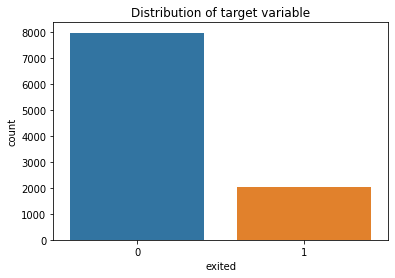

In [13]:
# Distribution of Target column 'Exited'
ax=sns.countplot(x='exited', data=df_OHE)
ax.set_title('Distribution of target variable')


We see that our classes are indeed imbalanced: there are more than twice as many observations when a client stayed with the bank than of those who left.

## Supervised Learning

### Feature Preparation

In [14]:
# Features and Target variables

features = df_OHE.drop(columns=['exited'],axis=1)
target =  df_OHE['exited']




In [15]:
# Examine the balance of classes


features_train, features_test, target_train, target_test = train_test_split(features, target, stratify = target, test_size=0.20, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, stratify = target_train, test_size=0.2, random_state=12345)

# Let's take a look at the split:
print(len(features_train))
print(len(target_train))
print(len(features_test))
print(len(target_test))
print(len(features_valid))
print(len(target_valid))

#

6400
6400
2000
2000
1600
1600


### Feature Scaling

In [16]:
# Feature Scaling

numeric = ['creditscore', 'age', 'balance', 'estimatedsalary', 'tenure', 'numofproducts']


scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.shape) 


(6400, 11)


<div class="alert alert-block alert-success">
<b>Success:</b> Great that scaler was fitted only on train part.
</div>

In [17]:
# Training unbalanced dataset with LogisticRegression.

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]



print("F1:", f1_score(target_valid, predicted_valid))
print('AUC:', roc_auc_score(target_valid, probabilities_one_valid))




F1: 0.3263403263403264
AUC: 0.7890394005643786


In [18]:
# Training unbalanced dataset with Decision Tree and tuning hyperparameters

for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth=depth,random_state=12345) # < create a model, specify max_depth=depth >

        # < train the model >
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid) # < find the predictions using validation set >
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    print("max_depth =", depth, "", end='')
    print('F1:',round(f1_score(target_valid, predictions_valid),2))
    print('AUC:', roc_auc_score(target_valid, probabilities_one_valid))
    print()

    

max_depth = 1 F1: 0.0
AUC: 0.7113795494601806

max_depth = 2 F1: 0.5
AUC: 0.7392373183346014

max_depth = 3 F1: 0.35
AUC: 0.8055602373087035

max_depth = 4 F1: 0.37
AUC: 0.8288480800531633

max_depth = 5 F1: 0.53
AUC: 0.8372403232175362

max_depth = 6 F1: 0.5
AUC: 0.835225029133881

max_depth = 7 F1: 0.54
AUC: 0.8365986555075076

max_depth = 8 F1: 0.55
AUC: 0.8273865704847297

max_depth = 9 F1: 0.53
AUC: 0.8091502056225983

max_depth = 10 F1: 0.52
AUC: 0.7885590526913926

max_depth = 11 F1: 0.52
AUC: 0.7539764135951691

max_depth = 12 F1: 0.51
AUC: 0.7394166963623581

max_depth = 13 F1: 0.49
AUC: 0.7188375822249617

max_depth = 14 F1: 0.47
AUC: 0.688913956332887

max_depth = 15 F1: 0.49
AUC: 0.681891727903998

max_depth = 16 F1: 0.47
AUC: 0.6685744141922932

max_depth = 17 F1: 0.47
AUC: 0.6675366701659426

max_depth = 18 F1: 0.47
AUC: 0.6691799655208945

max_depth = 19 F1: 0.47
AUC: 0.6713818609085919



In [19]:
# Training unbalanced dataset with Random Forest and tuning hyperparameters

best_score = 0
best_est = 0
best_depth = 0
for est in range(1, 50):
    for depth in range(1,50):
# choose hyperparameter range
        model = RandomForestClassifier(random_state=12345, n_estimators=est,max_depth=depth ) # set number of trees
        model.fit(features_train,target_train) # train model on training set
        predictions_valid = model.predict(features_valid)
   
    
        score_f1 = f1_score(target_valid,predictions_valid)
        if score_f1 > best_score:
            best_score = score_f1# save best accuracy score on validation set
            best_est = est# save number of estimators corresponding to best accuracy score
            best_depth = depth
        
    
        


print("F1 score of the best model on the validation set (n_estimators = {}, max_depth = {}): {}".format(best_est, best_depth,best_score))


F1 score of the best model on the validation set (n_estimators = 21, max_depth = 15): 0.5882352941176471


The Random Forest model yielded the highest f1 score (0.58) after tuning the hyperparameters on the unbalanced dataset. This f1 score is close to our target f1 score of 0.59, therefore the Random Forest Model will be used for the subsequent class imbalance corrections.

### Class Imbalance Correction and Hyper Parameter Tuning
In this section we will try to correct class imbalance using the following methods:

- Class Weight Adjustment;
- Upsampling;
- Downsampling.



#### Class Weight Adjustment

In [20]:
# Random Forest
balanced_forest_model = RandomForestClassifier(random_state=12345, n_estimators=21,max_depth=15,class_weight='balanced')
balanced_forest_model.fit(features_train,target_train)
forest_predicts = balanced_forest_model.predict(features_valid)
f1_score(target_valid,forest_predicts)


0.5683060109289617

#### Upsampling

In [21]:
# Upsampling function

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)

features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 10)



In [22]:
# Random Forest tuning hyper parameters 

upsampled_forest_model = RandomForestClassifier(random_state=12345, n_estimators=21,max_depth=15)
upsampled_forest_model.fit(features_train_upsampled,target_train_upsampled)
rfc_predicts = upsampled_forest_model.predict(features_valid)
f1_score(target_valid,rfc_predicts)

0.6002844950213372

Upsampling allows us to reach our target f1 score.

#### Downsampling

In [23]:
# downsampling function

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.1)


In [30]:
# Random Forest

downsampled_forest_model = RandomForestClassifier(random_state=12345, n_estimators=21,max_depth=15)
downsampled_forest_model.fit(features_train_downsampled,target_train_downsampled)
down_predicts = downsampled_forest_model.predict(features_valid)
print('F1 Score:',f1_score(target_valid,down_predicts))


F1 Score: 0.46223564954682783


### Final Model Testing

The upsampled random forest model yielded the highest f1 score and will be used in final model testing on the test set.

In [28]:
# Final model testing

upsampled_forest_model = RandomForestClassifier(random_state=12345, n_estimators=21,max_depth=15)
upsampled_forest_model.fit(features_train_upsampled,target_train_upsampled)
test_predicts = upsampled_forest_model.predict(features_test)
print('F1 Score:',f1_score(target_test,test_predicts))

F1 Score: 0.5988439306358381


### AUC-ROC metric

In [26]:
# Compare final_model AUC-ROC score to F1 score

probabilities_test = upsampled_forest_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
auc_roc

0.8419104775036977

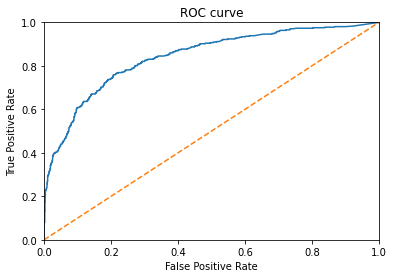

In [27]:
# Plot ROC-Curve

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 
plt.figure()
plt.plot(fpr, tpr)
# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC curve')
plt.show()


We put the false positive rate values (FPR) along the horizontal axis, and true positive rate values (TPR) along the vertical axis. Then we iterate over the logistic regression threshold values and plot a curve. It is called the ROC curve (Receiver Operating Characteristic — a term from signal processing theory). The higher the curve, the greater the TPR value and the better the model's quality.

## Conclusion

In this project I developed a binary classification model that analyzes data on clients’ past behavior and termination of contracts with the bank and predicts whether a customer will leave the bank soon.

